In [1]:
import os
import random

import cv2

import tensorflow as tf

2023-11-10 05:29:12.523294: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-10 05:29:12.525307: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-10 05:29:12.566722: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-10 05:29:12.567846: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-10 05:29:13.260127: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

`Loading data`

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2160 files belonging to 3 classes.


2023-11-10 05:29:18.071229: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
data_iterator = data.as_numpy_iterator()

2023-11-10 05:29:18.179516: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2160]
	 [[{{node Placeholder/_4}}]]
2023-11-10 05:29:18.179891: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2160]
	 [[{{node Placeholder/_0}}]]


In [5]:
batch = data_iterator.next()

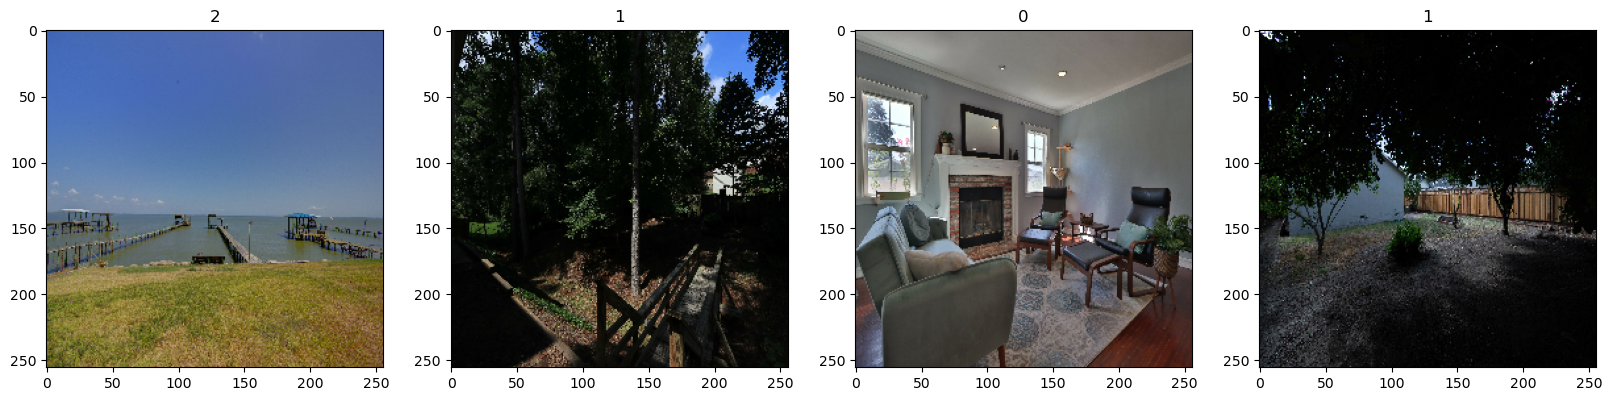

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][0:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

1 = ue <br>
0 = pl <br>
2 = wl <br>

`Preprocess Data`

In [7]:
data = data.map(lambda x, y: (x/255, y))

In [8]:
data.as_numpy_iterator().next()

2023-11-10 05:29:20.767724: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2160]
	 [[{{node Placeholder/_4}}]]
2023-11-10 05:29:20.768030: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2160]
	 [[{{node Placeholder/_4}}]]


(array([[[[4.87745106e-02, 3.07598040e-02, 6.81372583e-02],
          [4.04534310e-01, 3.95220578e-01, 8.27083349e-01],
          [9.86887276e-01, 1.00000000e+00, 9.98897076e-01],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [7.84313772e-03, 7.84313772e-03, 7.84313772e-03]],
 
         [[1.56862754e-02, 1.17647061e-02, 3.13725509e-02],
          [8.92647088e-01, 9.93872523e-01, 9.65808809e-01],
          [9.94485319e-01, 9.93995070e-01, 9.95465696e-01],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[1.75245106e-02, 1.75245106e-02, 1.75245106e-02],
          [2.25490201e-02, 2.35294122e-02, 3.13725509e-02],
          [1.61887258e-01, 1.89338237e-01, 5.25612772e-01],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.0000

`Split data (70:20:10)`

In [9]:
train_size = int(0.7*len(data))
val_size = int(0.2*len(data))
test_size = len(data) - train_size - val_size
train_size, val_size, test_size

(47, 13, 8)

In [10]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Model

### Building Deep learning model

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.regularizers import l2

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [14]:
model.compile('adam', loss = tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Train

In [16]:
logdir = 'logs'

In [17]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [18]:
hist = model.fit(train, epochs = 20, validation_data = val, callbacks = [tensorboard_callback])

Epoch 1/20


2023-11-10 05:29:22.508155: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2160]
	 [[{{node Placeholder/_4}}]]
2023-11-10 05:29:22.508559: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2160]
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 0.6940 - accuracy: 0.7274

2023-11-10 05:29:31.938302: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2160]
	 [[{{node Placeholder/_4}}]]
2023-11-10 05:29:31.938756: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2160]
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 16s 299ms/step - loss: 0.6940 - accuracy: 0.7274 - val_loss: 0.2456 - val_accuracy: 0.9038
Epoch 2/20
47/47 [==============================] - 15s 299ms/step - loss: 0.2093 - accuracy: 0.9096 - val_loss: 0.2546 - val_accuracy: 0.8678
Epoch 3/20
47/47 [==============================] - 15s 298ms/step - loss: 0.2111 - accuracy: 0.9096 - val_loss: 0.1792 - val_accuracy: 0.9327
Epoch 4/20
47/47 [==============================] - 15s 300ms/step - loss: 0.0972 - accuracy: 0.9668 - val_loss: 0.2072 - val_accuracy: 0.8918
Epoch 5/20
47/47 [==============================] - 15s 297ms/step - loss: 0.0819 - accuracy: 0.9714 - val_loss: 0.0981 - val_accuracy: 0.9615
Epoch 6/20
47/47 [==============================] - 15s 298ms/step - loss: 0.0655 - accuracy: 0.9727 - val_loss: 0.2186 - val_accuracy: 0.9159
Epoch 7/20
47/47 [==============================] - 15s 296ms/step - loss: 0.0340 - accuracy: 0.9907 - val_loss: 0.0579 - val_accuracy: 0.9784
Epoch 8/20

### Plot performance

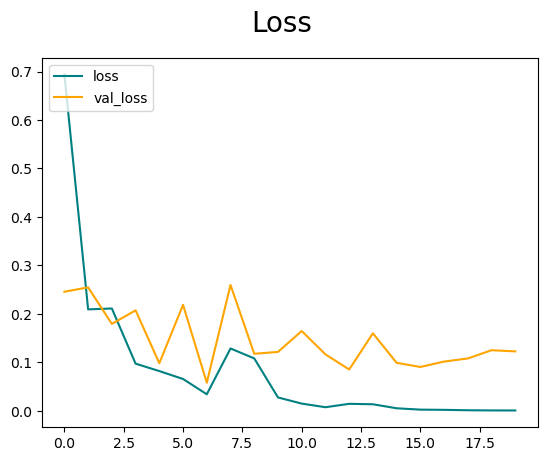

In [26]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

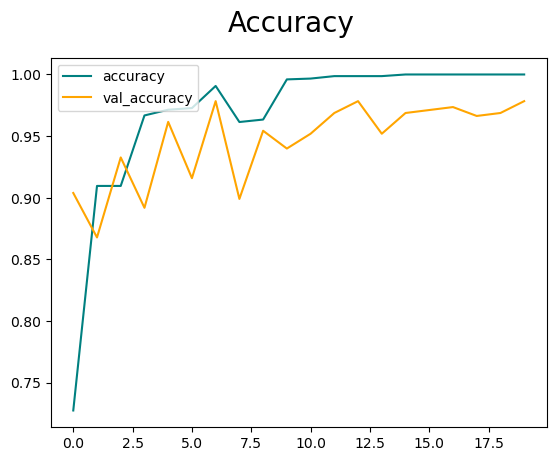

In [27]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc='upper left')
plt.show()

## Evaluation

In [28]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [29]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [30]:
len(test)

8

In [31]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    # acc.update_state(y, yhat)

1/1 [==============================] - 0s 76ms/step


ValueError: Shapes (32, 3) and (32,) are incompatible